
### 1. How many multiplications and additions do you need to perform a matrix multiplication between A(n, k) and B(k, m) matrix? Explain

In [ ]:
"""
A(nxk) * B(kxm) = R(nxm)
   --      --                      
  | a b c d  |
A=| e f g h  |
   --      -- 2x4

   --    --                     
  | 1 2 3 |               R11=( a*1 + b*r + c*7 + d*4 )           So, Rij requires 4=k multiplications
B=| 4 5 6 |               R12=( a*2 + b*5 + c*8 + d*1 )
  | 7 8 9 |               R13=( a*3 + b*6 + c*9 + d*6 )      
  | 4 1 6 |
   --   -- 4x3

## For multiplications
Hence, we can conclude that for the multiplication of A(nxk) and B(kxm), each element of resultant matrix R requires k multiplications.
So, total elements in matrix R  = nxm
Therefore, <b>total number of multiplications performed for  (nxm) elements of resultant matrix R = (nxm) x k </b>



## For additions<br>
From the above example we can see that for each element of resultant matrix R, the number of additions required is (k-1).
Therefore, <b>total number of additions required for (nxm) elements of resultant matrix R = (nxm) x (k-1)  </b>

"""

### 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [85]:
import time
a=[[1,2,3,4],[5,6,7,8],[3,5,6,10]] #3x4  = ixk
b=[[11,12,13,14],[15,16,17,18],[13,5,16,11],[11,21,31,14]] #4x4  = kxj
r=[[0,0,0,0],[0,0,0,0],[0,0,0,0]] #3x4 =ixj  resultant matrix initialized with 0 in order to get the indices while saving the results into it

t0WithList=time.time()

# matrix multiplication using nested lists
for i in range(0,len(a)):
    for j in range(0,len(b)):
        for k in range(0,len(a[0])):
            r[i][j] += a[i][k] * b[k][j]
print(r)
t1WithList=time.time()
print("time taken to multiply two matrices using nested lists =",t1WithList - t0WithList)

# print(r)

# print("The resultant matrix is :")
# for i in range(0,len(a)):
#     for j in range(0,len(b[0])):
#         print(r[i][j],end=" ")
#     print()

# matrix multiplication using numpy arrays
t0WithNpArray=time.time()
import numpy as np
r1=np.dot(a,b)
print(r1)
t1WithNpArray=time.time()

print("time taken to multiply two matrices using nested lists =",t1WithNpArray-t0WithNpArray)


# Matrix multiplication using numpy arrays is faster than using lists due to  many reasons :
# 1. numpy array always stores homogenous elements which reduces overhead of type checking for each element
# 2. numpy array stores elements in contagious manner which allows for faster element access,
#     whereas list is array of pointers to objects which makes the element access slower
# For the large size matrices the difference between performance of list and numpy array is very huge due to above two main reasons


[[124, 143, 219, 139], [324, 359, 527, 367], [296, 356, 530, 338]]
time taken to multiply two matrices using nested lists = 0.001003265380859375
[[124 143 219 139]
 [324 359 527 367]
 [296 356 530 338]]
time taken to multiply two matrices using nested lists = 0.0009961128234863281


### 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [ ]:
# Assuming the list to be of odd size, since finding highest element requires one pass and find second highest element requires two passes.
# For the odd size list, the median is (n/2)th highest element, so according to above approach it will require (n/2)th passes
# Finding median using this approach costs O(n/2) = O(n) time complexity

In [170]:
l=[4,5,1,2,6,7,8,14,51,26,37,48,9,20,12,3,54,45,32,33,78,50,65,22,21,13,49,77,19,23,42] # len=31 
# print(l.sort())
# print(l)

# here the list have 31 elements, so the median will be at 16th position if this array was sorted

# below the findMax function finds the highest element just smaller than its parameter Max
# so we need to find 16 highest number to get our required median

import time

t0=time.time()

def findMax(Max):
    secMax=-100000
    for ele in l:
        if(ele>secMax and ele<Max):
            secMax=ele
    return secMax
    

Max=1000000000 # initialised a big number Max with this we will find maximum in the array since all array element are smaller than this
# for i in range(0,int(len(l)/2)-1):  # loop runs 14 times, at the 

for i in range(1,int(len(l)/2 +2 )):  # loop runs 16 times, at the 
    Max=findMax(Max)
    # print(i," ",Max)
print("Median using the given conventional method : ",Max)

t1=time.time()

print("time using the given conventional method : ",t1-t0)


t3=time.time()

import numpy as np
print("Median using numpy.median fun : ",np.median(l))

t4=time.time()

print("time using numpy.median fun : ",t4-t3)


# So we can see numpy.median performs better than the given method

Median using the given conventional method :  22
time using the given conventional method :  0.0010025501251220703
Median using numpy.median fun :  22.0
time using numpy.median fun :  0.0


### 4. What is the gradient of the following function with respect to x and y?    $x^2 y + y^3 sin(x)$

In [ ]:
"""
For f(x,y) = x^2 y  + y^3 sin(x),
grad(x,y)= (∂f/∂x , ∂f/∂y)                            ∂f/∂x =  2xy + y^3 cos(x)  ,  ∂f/∂y = x^2  +  3y^2 sin(x)

Therefore grad(x,y) = (  2xy + y^3 cos(x)  ,  ∂f/∂y = x^2  +  3y^2 sin(x) )
Computing gradient at x=1, y=3
grad(1,3)= (2*1*3 + 3^3 * cos(1) , 1^2 + 3 * 3^2 * sin(1))
         = (6 + 27 * 0.54 , 1 + 27 * 0.84)
         = (20.58 , 23.68)

"""

### 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [ ]:
# !pip install jax

In [212]:
import jax
import jax.numpy as jnp

# f = "x**2 * y + y**3 * jnp.sin(x)"    # given function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)


gradF = jax.grad(f, argnums=(0, 1))

# Test values
xValue = 1.0
yValue = 3.0

# Compute the gradient at the test values
gradX, gradY = gradF(xValue, yValue)

print(f"gradient at (x={xValue}, y={yValue}):")
print(f"grad(f)= (∂f/∂x , ∂f/∂y) = ( {gradX}, {gradY} )")


gradient at (x=1.0, y=3.0):
grad(f)= (∂f/∂x , ∂f/∂y) = ( 20.58816146850586, 23.719715118408203 )


### 6. Use sympy to confirm that you obtain the same gradient analytically.



In [202]:
!pip install sympy

In [216]:
import sympy as sp

x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# finding  the partial derivatives wrt x and y
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# print(f"Partial derivative wrt x: {df_dx}")
# print(f"Partial derivative wrt y: {df_dy}")

# values  to test 
xValue = 1.0
yValue = 3.0

gradX = df_dx.subs({x: xValue, y: yValue})
gradY = df_dy.subs({x: xValue, y: yValue})

print(f"gradient at (x={xValue}, y={yValue}):")
print(f"grad(f)= (∂f/∂x , ∂f/∂y) = ( {gradX}, {gradY} )")


gradient at (x=1.0, y=3.0):
grad(f)= (∂f/∂x , ∂f/∂y) = ( 20.5881622584398, 23.7197165898132 )


### 7.Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

>1.2022<br>
    >>1.Branch 1<br>
        >>>1.Roll Number: 1, Name: N,Marks : 1.Maths: 100, English: 70 …<br>
        
            2. Branch 2
                  
>2.2023<br>
    >>1.Branch 1<br>
    >>2.Branch 2<br>

>3.2024<br>
    >>1.Branch 1<br>
    >>2.Branch 2<br>

>4.2025<br>
    >>1.Branch 1<br>
    >>2.Branch 2<br>


In [2]:
d = { 2022 : { "Branch1" : {"Roll Number" :1, "Name" : "Shivam","Marks" : {"Maths":100, "English":93,"DSA":100,"ML":96,"AI":95}, "Branch2" :"No Data"  } }, 
     2023 : { "Branch1" : {"Roll Number" :2, "Name" : "A","Marks" : {"Maths":90, "English":90,"DSA":85,"ML":70,"AI":75}}, "Branch2" : "No Data" }, 
     2024 : { "Branch1" : {"Roll Number" :3, "Name" : "B","Marks" : {"Maths":93, "English":90,"DSA":82,"ML":80,"AI":76}}, "Branch2" : "No Data" },
    2025 : { "Branch1" : {"Roll Number" :1, "Name" : "Svm","Marks" : {"Maths":95, "English":81,"DSA":85,"ML":90,"AI":87}}, "Branch2" : "No Data"  } }

#printing the above dictionary
print(d)

{2022: {'Branch1': {'Roll Number': 1, 'Name': 'Shivam', 'Marks': {'Maths': 100, 'English': 93, 'DSA': 100, 'ML': 96, 'AI': 95}, 'Branch2': 'No Data'}}, 2023: {'Branch1': {'Roll Number': 2, 'Name': 'A', 'Marks': {'Maths': 90, 'English': 90, 'DSA': 85, 'ML': 70, 'AI': 75}}, 'Branch2': 'No Data'}, 2024: {'Branch1': {'Roll Number': 3, 'Name': 'B', 'Marks': {'Maths': 93, 'English': 90, 'DSA': 82, 'ML': 80, 'AI': 76}}, 'Branch2': 'No Data'}, 2025: {'Branch1': {'Roll Number': 1, 'Name': 'Svm', 'Marks': {'Maths': 95, 'English': 81, 'DSA': 85, 'ML': 90, 'AI': 87}}, 'Branch2': 'No Data'}}


### 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [4]:
class Year:
    # Branch1={}    # {"A" :{"Name": ,"Roll Number": , "Marks" :{"Maths": ,"English": , "ML": }}}
    def branch(self,year,name,rollNum,mathsMarks,engMarks,mlMarks):
        d={year: {"Name": name ,"Roll Number": rollNum , "Marks" :{"Maths": mathsMarks ,"English":  engMarks , "ML": mlMarks }} }
        return d
y2022=Year()
data2022_obj1 = y2022.branch(2022,"A",2,95,85,90)
# print(data2022)

y2023=Year()
data2023_obj1 = y2023.branch(2023,"B",3,95,80,92)

y2024=Year()
data2024_obj1 = y2024.branch(2024,"C",4,90,80,80)

y2025=Year()
data2025_obj1 = y2025.branch(2025,"D",5,91,85,87)

overallDatabase=[data2022_obj1,data2023_obj1, data2024_obj1, data2025_obj1]

print("As of now the overall database is :")
for lst in overallDatabase:
    print(lst)



As of now the overall database is :
{2022: {'Name': 'A', 'Roll Number': 2, 'Marks': {'Maths': 95, 'English': 85, 'ML': 90}}}
{2023: {'Name': 'B', 'Roll Number': 3, 'Marks': {'Maths': 95, 'English': 80, 'ML': 92}}}
{2024: {'Name': 'C', 'Roll Number': 4, 'Marks': {'Maths': 90, 'English': 80, 'ML': 80}}}
{2025: {'Name': 'D', 'Roll Number': 5, 'Marks': {'Maths': 91, 'English': 85, 'ML': 87}}}


### 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
$y=x$ <br>
$y=x^2$ <br>
$y=x^3/100$ <br>
$y=sin(x)$ <br>
$y=sin(x)/x$ <br>
$y=log(x)$<br>
$y=e^x$


Matplotlib is building the font cache; this may take a moment.


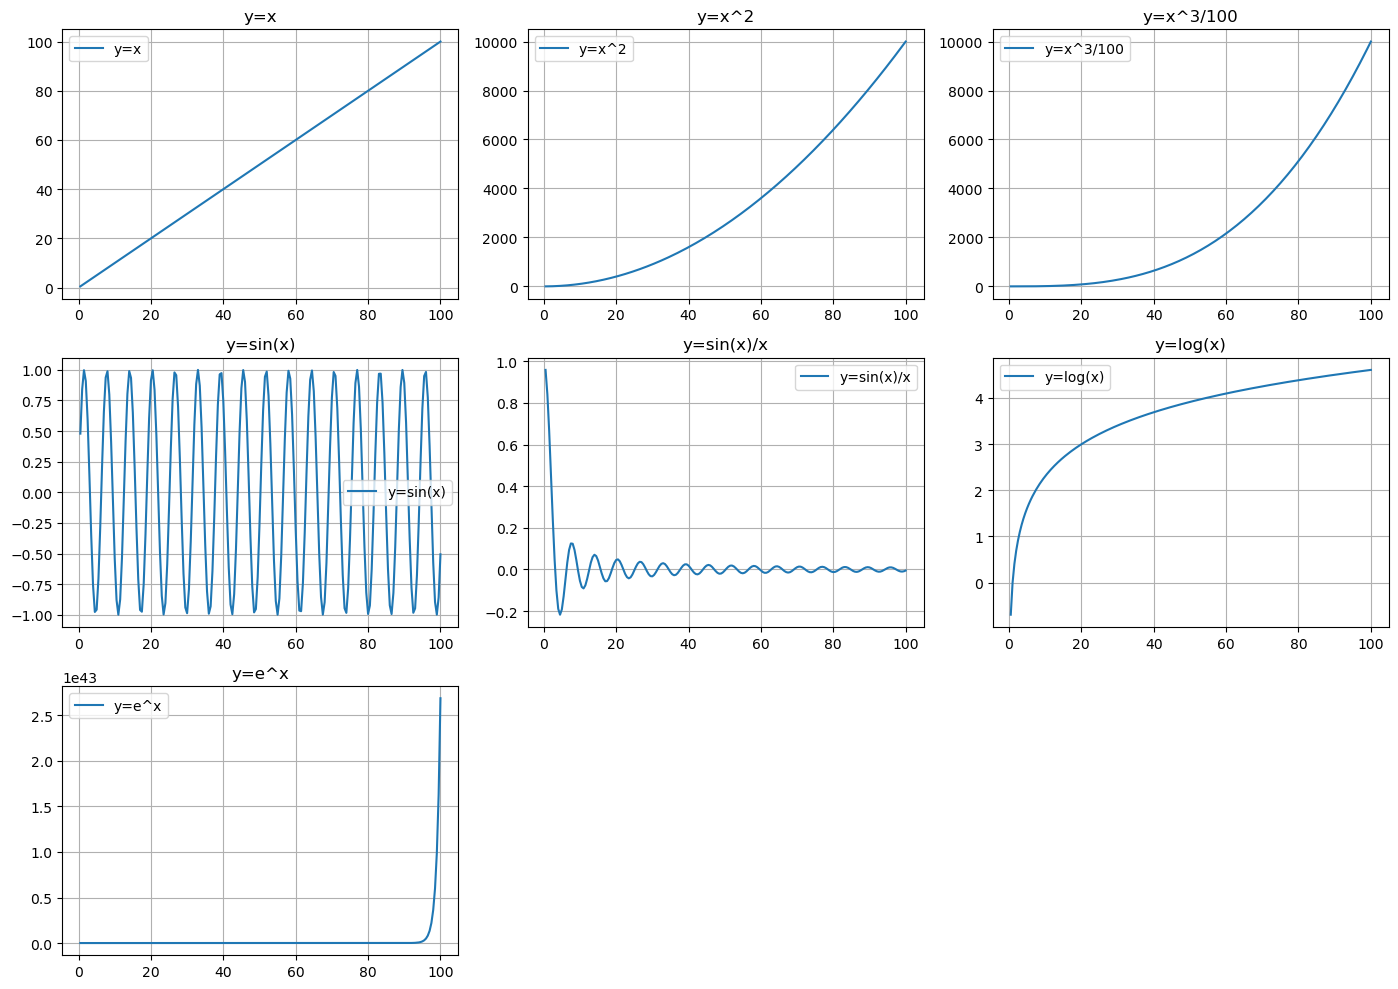

In [244]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0.5, 100.5, 0.5)  # limit

# Defining all the functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)


plt.figure(figsize=(14, 10)) # fig size 

# y=x
plt.subplot(3, 3, 1) # 3x3 grid; adds subplot in the current fig
plt.plot(x, y1, label='y=x')
plt.title('y=x')
plt.grid(True)
plt.legend()  # shows the label assigned to each plot

# y=x^2
plt.subplot(3, 3, 2)
plt.plot(x, y2, label='y=x^2')
plt.title('y=x^2')
plt.grid(True)
plt.legend()

# y=x^3/100
plt.subplot(3, 3, 3)
plt.plot(x, y3, label='y=x^3/100')
plt.title('y=x^3/100')
plt.grid(True)
plt.legend()

# y=sin(x)
plt.subplot(3, 3, 4)
plt.plot(x, y4, label='y=sin(x)')
plt.title('y=sin(x)')
plt.grid(True)
plt.legend()

# y=sin(x)/x
plt.subplot(3, 3, 5)
plt.plot(x, y5, label='y=sin(x)/x')
plt.title('y=sin(x)/x')
plt.grid(True)
plt.legend()

# y=log(x)
plt.subplot(3, 3, 6)
plt.plot(x, y6, label='y=log(x)')
plt.title('y=log(x)')
plt.grid(True)
plt.legend()

# y=e^x
plt.subplot(3, 3, 7)
plt.plot(x, y7, label='y=e^x')
plt.title('y=e^x')
plt.grid(True)
plt.legend()

plt.tight_layout() # adjusting the overall layout
 

plt.show()  


### 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [363]:
import numpy as np
import pandas as pd

random2DArray=np.random.randint(3,14,(20, 5))
# data = random2DArray

# Define column names
columns = ['a', 'b', 'c','d','e']

df = pd.DataFrame(random2DArray, columns=columns) # creating a dataframe from 2D array
# print(df)

#Finding the column with the highest standard deviation

stdDev = np.std(random2DArray, axis=0) #std deviation of each col
maxStdDevIndex = np.argmax(stdDev) # index of col with highest standard deviation
print("Column with highest standard deviation : ",columns[maxStdDev])

#Finding row  with the lowest mean

rowMeans = np.mean(random2DArray, axis=1) # means of all rows

minMeanIndex = np.argmin(rowMeans) # index of the row with lowest mean
print("The row number with minimum mean : ",minMeanIndex+1)

Column with highest standard deviation :  a
The row number with minimum mean :  19


### 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [365]:
#using the above problem code (for this first run theh above cell no 263)
rowMeans = np.mean(random2DArray, axis=1) # means of all rows

#now we need to add array of sum of each row to our dataframe
df['f'] = rowMeans
# print(df)

g=[]
lt8Arr=[]
gt8Arr=[]
for num in rowMeans:
    if(num<8):
        g.append("LT8")
        lt8Arr.append(num)  #storing values of col f in new array where the value<8
    elif(num>8):
        g.append("GT8")
        gt8Arr.append(num)    ##storing values of col f in new array where the value>8

g=np.array(g)
lt8Arr=np.array(lt8Arr)
gt8Arr=np.array(gt8Arr)

#adding new  column  g with the given conditions
df['g']=g
# print(df)

print("The standard deviation of column f where the values are < 8 is ", np.std(lt8Arr,ddof=1))  # by default ddof=0 which find population std dev, =1 to find sample std dev

print("The standard deviation of column f where the values are > 8 is ", np.std(gt8Arr,ddof=1))

The standard deviation of column f where the values are < 8 is  0.8766096305907461
The standard deviation of column f where the values are > 8 is  0.8189424074174368


### 12. Write a small piece of code to explain broadcasting in numpy.



In [347]:
# In numpy broadcasting is how to handle arrays of different dimensions during an arithmetic operation.

import numpy as np

A = np.array([[1, 2,5],
              [4, 3,6],
              [7, 5,2]])         #2D array

v = np.array([10, 20, 30]) # 1D array or vector


res = A * v     # adds the vector to each row of the matrix A
print(res)

[[ 10  40 150]
 [ 40  60 180]
 [ 70 100  60]]


### 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [335]:
def findMin(arr):
    min=100000000
    index=-1
    for i in range(len(arr)):
        if(arr[i]<min):
            min=arr[i]
            index=i
    return  index

arr=np.random.randint(low=0, high=1000, size=(100))
print("Minimum element using our function is : ",findMin(arr))

print("Minimum element using np.argmin function is :", np.argmin(arr))

Minimum element using our function is :  82
Minimum element using np.argmin function is : 82
